# Clustering Wines

Dataset: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
wine = pd.read_csv("wine-clustering.csv")
df = wine.copy()

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
df.shape

(178, 13)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Outliers Check

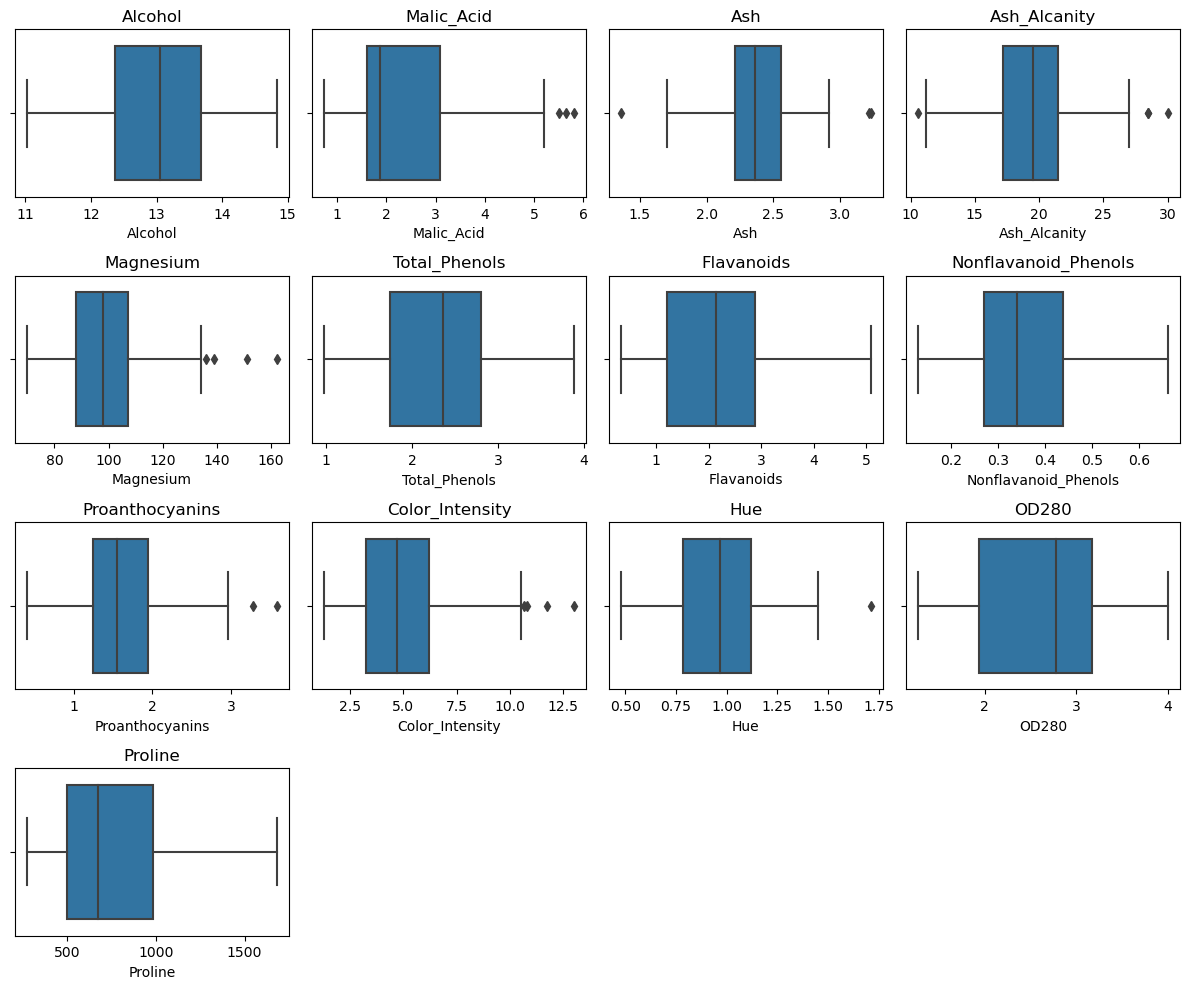

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)
    
for i in range(len(df.columns), 4 * 4):
    fig.delaxes(axes[i // 4, i % 4])
    
plt.tight_layout()
plt.show()

There are no significant outliers to handle

## Analyzing Relationships

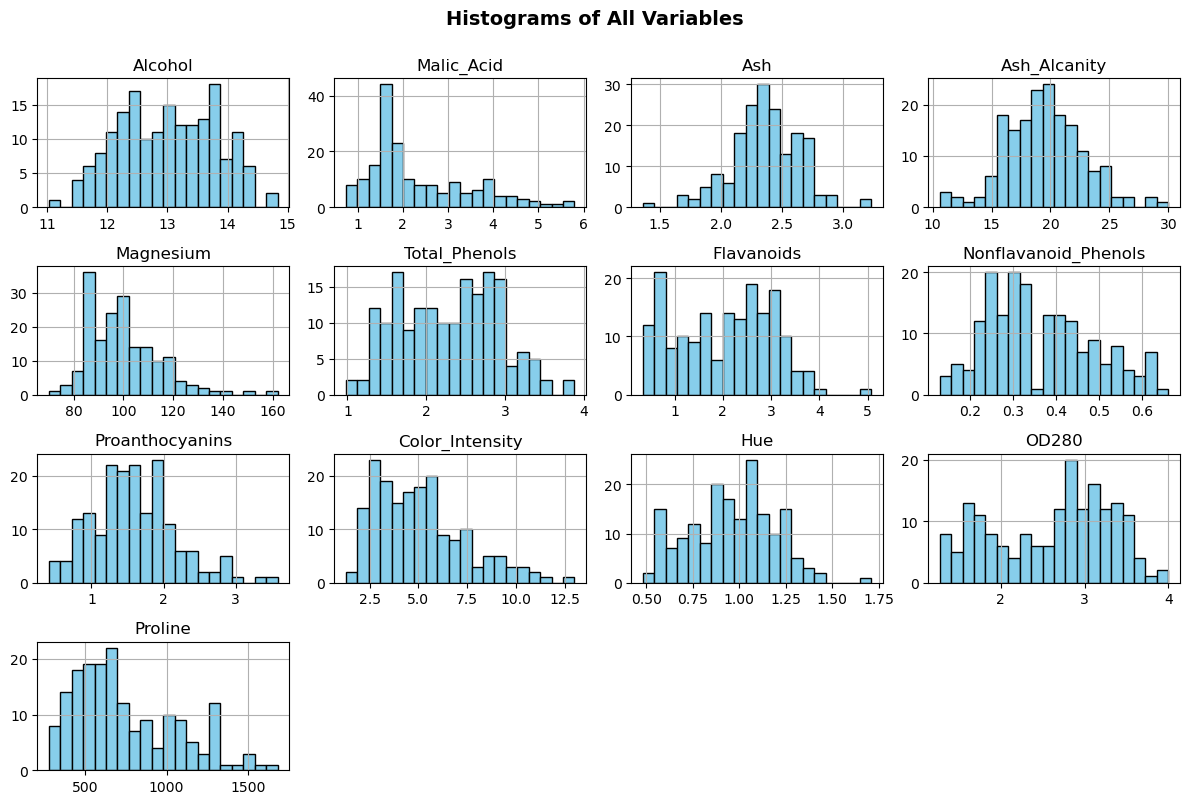

In [10]:
df.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of All Variables", fontsize=14, fontweight="bold", y=1)

plt.tight_layout()
plt.show()

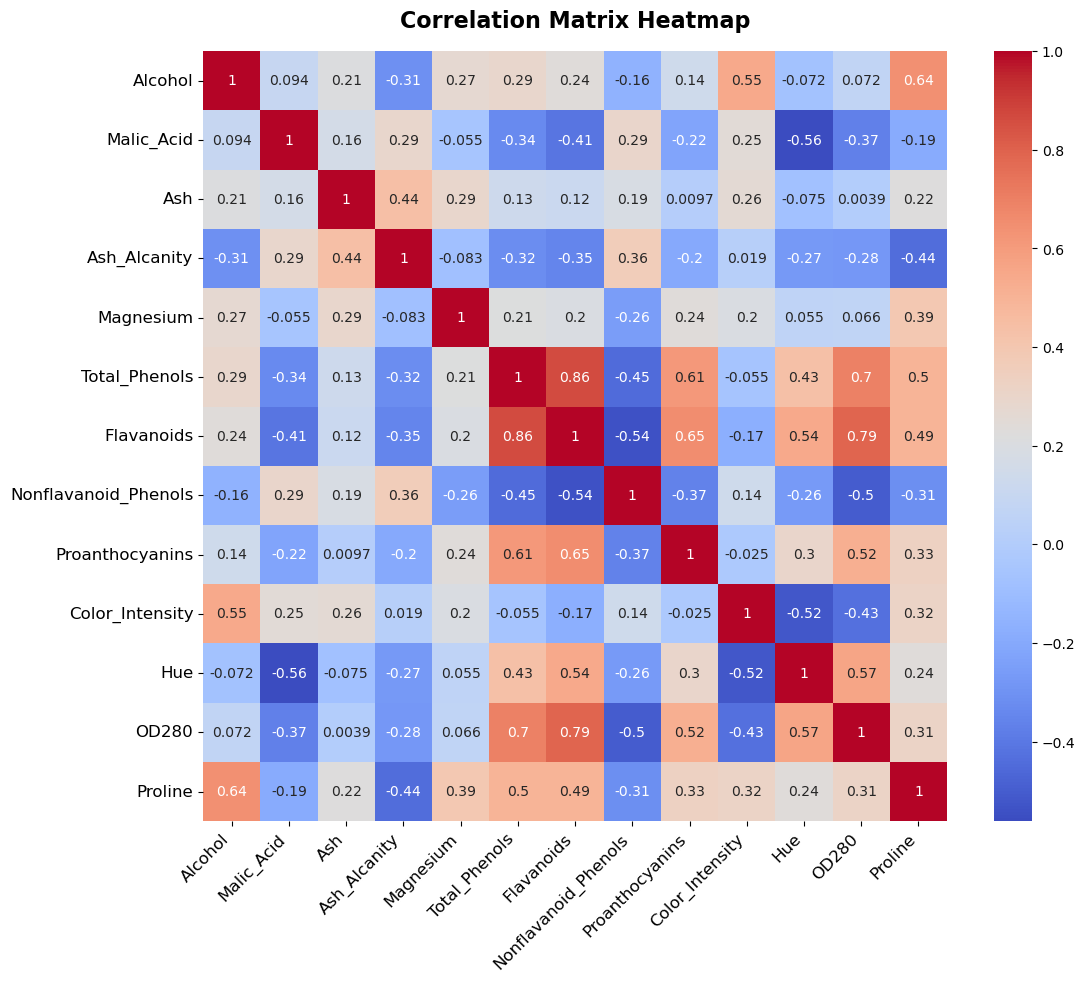

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold", y=1.02)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(rotation=0, fontsize=12)
plt.show()

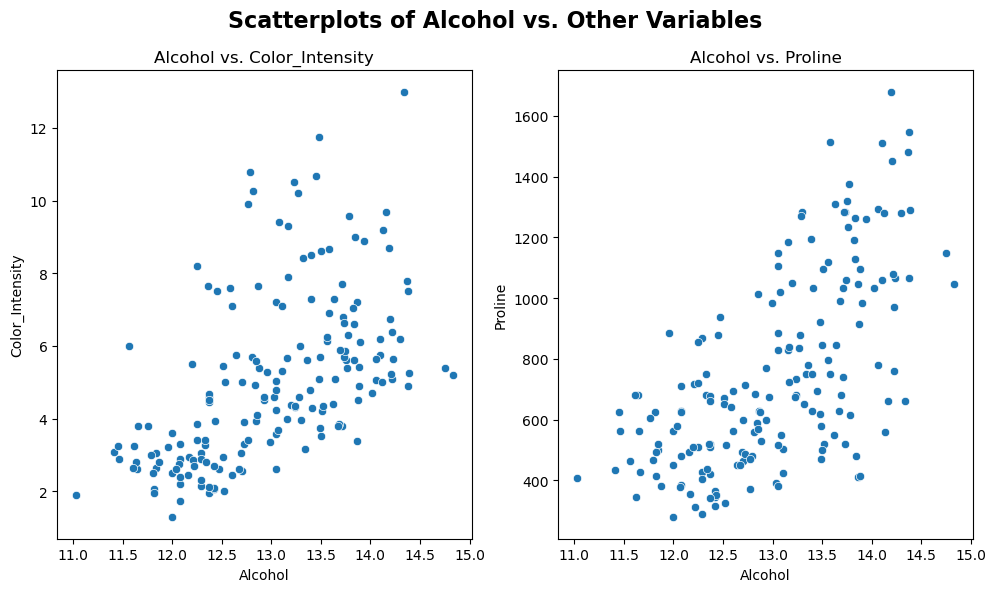

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(data=df, x="Alcohol", y="Color_Intensity", ax=ax[0])
ax[0].set_title("Alcohol vs. Color_Intensity")

sns.scatterplot(data=df, x="Alcohol", y="Proline", ax=ax[1])
ax[1].set_title("Alcohol vs. Proline")

plt.suptitle("Scatterplots of Alcohol vs. Other Variables", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

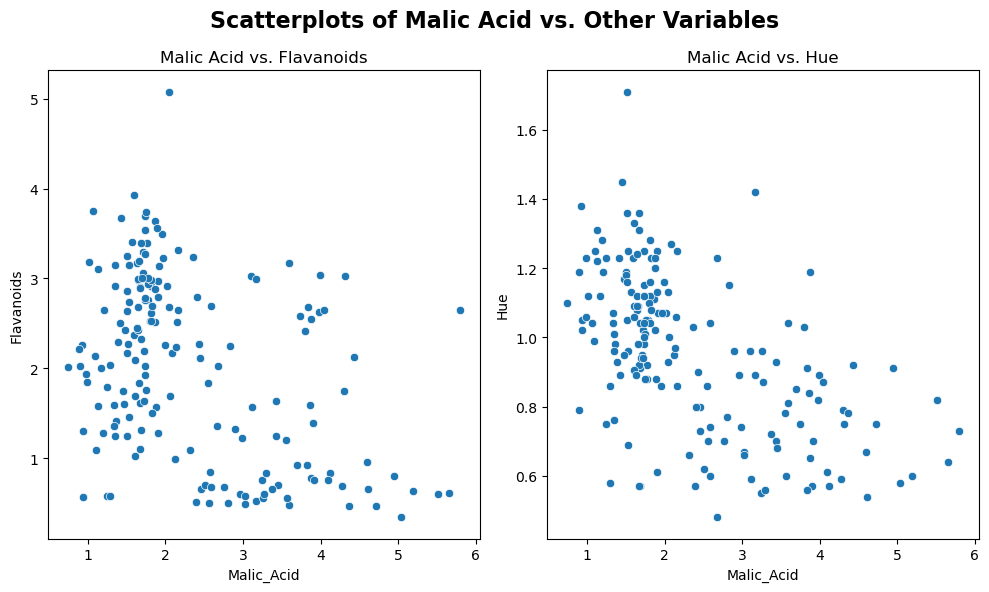

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(data=df, x="Malic_Acid", y="Flavanoids", ax=ax[0])
ax[0].set_title("Malic Acid vs. Flavanoids")

sns.scatterplot(data=df, x="Malic_Acid", y="Hue", ax=ax[1])
ax[1].set_title("Malic Acid vs. Hue")

plt.suptitle("Scatterplots of Malic Acid vs. Other Variables", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

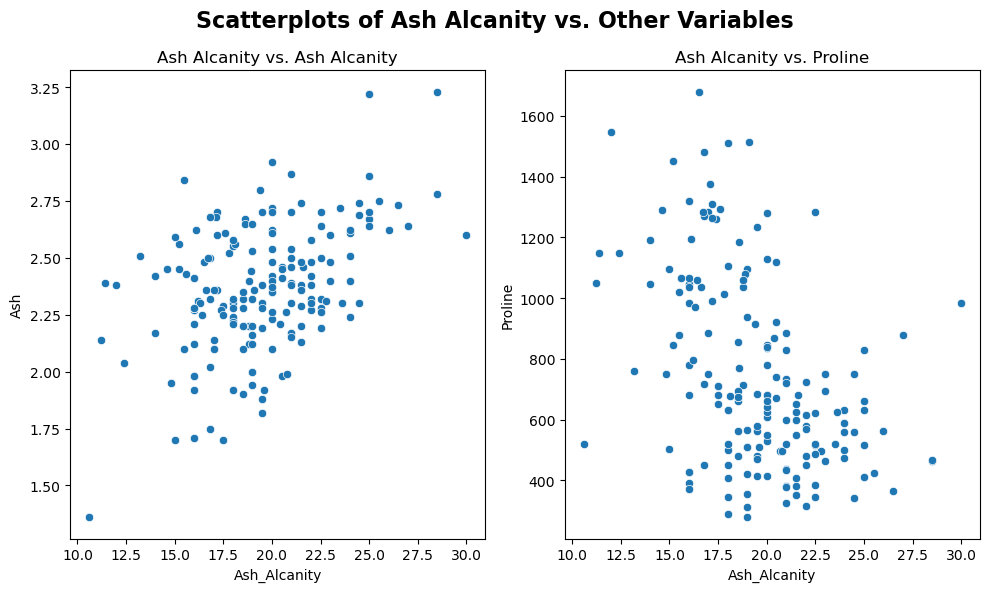

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(data=df, x="Ash_Alcanity", y="Ash", ax=ax[0])
ax[0].set_title("Ash Alcanity vs. Ash Alcanity")

sns.scatterplot(data=df, x="Ash_Alcanity", y="Proline", ax=ax[1])
ax[1].set_title("Ash Alcanity vs. Proline")

plt.suptitle("Scatterplots of Ash Alcanity vs. Other Variables", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

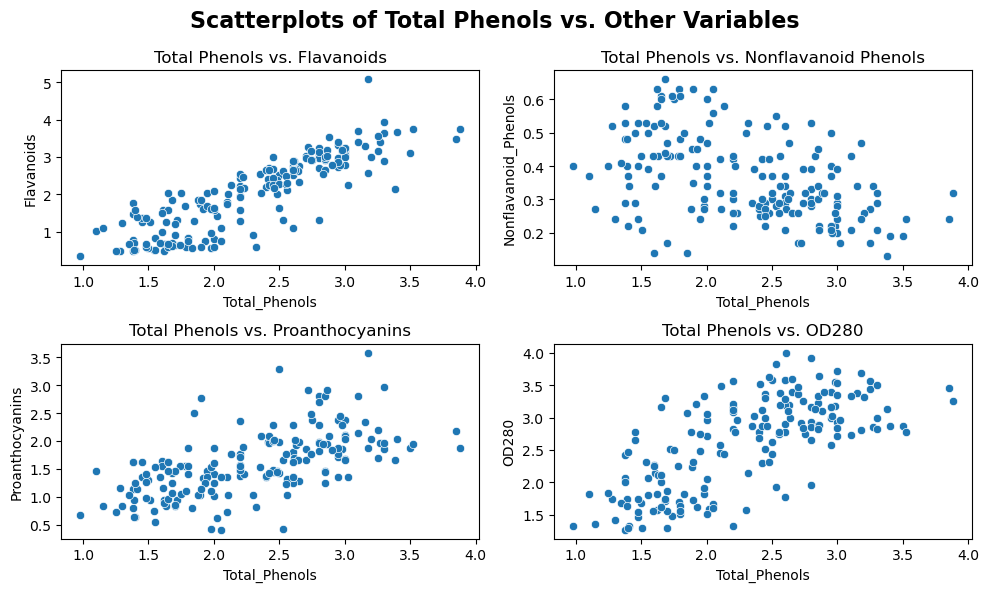

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.scatterplot(data=df, x="Total_Phenols", y="Flavanoids", ax=axes[0, 0])
axes[0, 0].set_title("Total Phenols vs. Flavanoids")

sns.scatterplot(data=df, x="Total_Phenols", y="Nonflavanoid_Phenols", ax=axes[0, 1])
axes[0, 1].set_title("Total Phenols vs. Nonflavanoid Phenols")

sns.scatterplot(data=df, x="Total_Phenols", y="Proanthocyanins", ax=axes[1, 0])
axes[1, 0].set_title("Total Phenols vs. Proanthocyanins")

sns.scatterplot(data=df, x="Total_Phenols", y="OD280", ax=axes[1, 1])
axes[1, 1].set_title("Total Phenols vs. OD280")

plt.suptitle("Scatterplots of Total Phenols vs. Other Variables", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

## Clustering

In [16]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data=X, columns=df.columns)

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


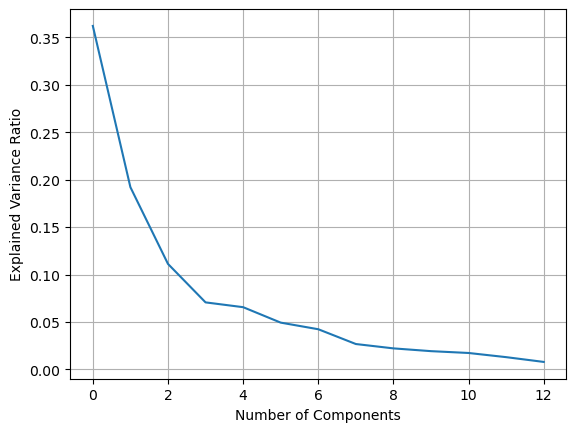

In [19]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=df.shape[1])
pca.fit(df)

explained_variance = pca.explained_variance_ratio_

plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

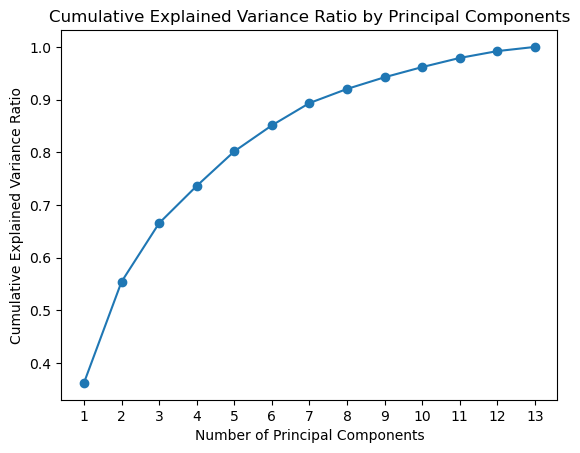

In [20]:
cumulative_variance_ratio = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker="o")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio by Principal Components")
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.show()

We've selected 3 as the number of components

In [21]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(df)

components = pd.DataFrame(data=pca_df, columns=["First Component", "Second Component", "Third Component"])
print(components.head())

print(pca.explained_variance_ratio_)

   First Component  Second Component  Third Component
0         3.316751         -1.443463        -0.165739
1         2.209465          0.333393        -2.026457
2         2.516740         -1.031151         0.982819
3         3.757066         -2.756372        -0.176192
4         1.008908         -0.869831         2.026688
[0.36198848 0.1920749  0.11123631]


In [22]:
explained_variance = pca.explained_variance_ratio_

total_explained_variance = explained_variance.sum()
print("Total explained variance ratio:", total_explained_variance)

Total explained variance ratio: 0.6652996889318527


### K-Means

In [23]:
from sklearn.cluster import KMeans

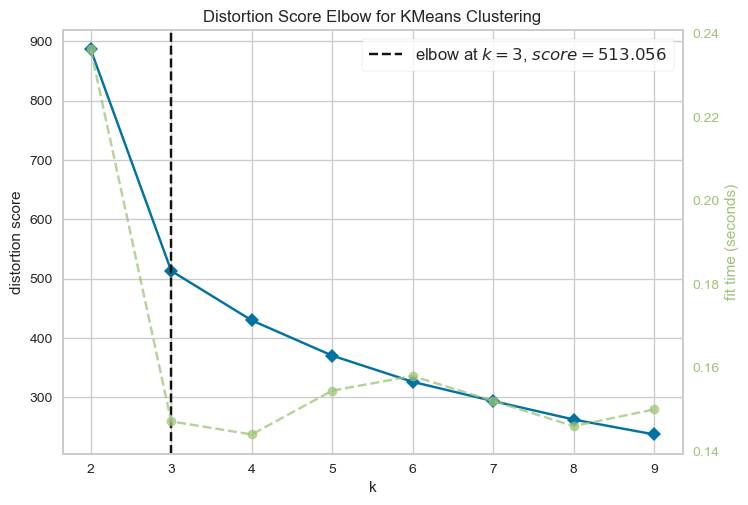

In [24]:
# Let's find the best number of clusters

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(pca_df)
visualizer.poof();

We've selected 3 as the number of clusters

In [26]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)

In [31]:
import time

start_time = time.time()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(pca_df)

elapsed_time = time.time() - start_time

print(f"K-Means Clustering completed in {elapsed_time:.2f} seconds")

K-Means Clustering completed in 0.02 seconds


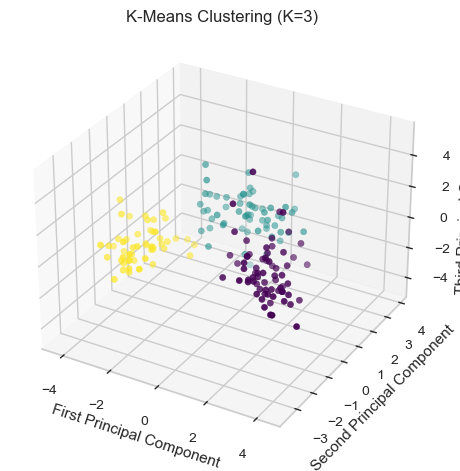

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=kmeans.labels_, cmap="viridis")

ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")

ax.set_title(f"K-Means Clustering (K={n_clusters})")

plt.show()